## Problemstilling


In [ ]:
## Import kaggle data

!kaggle datasets download -d danielshanbalico/dog-vs-not-dog

In [1]:
## Structure data and scale it 
from PIL import Image  # Assuming Pillow for image processing
import csv
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint

data_path = 'dog-vs-not-dog/'

# remove labels.csv because it's not a class
class_names = sorted(os.listdir(data_path))
class_names.remove('labels.csv')
num_classes = len(class_names)

img_size = (96, 96, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


images = []
labels = []
labels_df = pd.read_csv('dog-vs-not-dog/labels.csv')

print('\n\nlabels dataframe: \n', labels_df.head())

for index, row in labels_df.iterrows():
    image_path = data_path + row[2] + '/' + row[1]
    image = Image.open(image_path).convert('RGB')  # Open and convert to RGB
    image = np.asarray(image.resize(img_size[0:2]))  # Resize to desired size
    images.append(np.asarray(image))

    label = np.zeros(num_classes)
    label[class_names.index(row[2])] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



2 classes: ['dog', 'other']
image size: (96, 96, 3)


labels dataframe: 
    Unnamed: 0                                 filename  label
0           0   QYjQz1LS7dATFSYYRfnOfk6ezX8Gp49589.jpg  other
1           1   rltnrLmjyQgZnuSpbTKjPrm24wjHL43876.jpg  other
2           2  LNZNJPLSMhZAo8siLJlLVdHoxCTU5T11617.jpg  other
3           3   5ghe8eSnGWzfpowvy0oeLnqkEPqYbO8045.jpg  other
4           4  2V3zbjyoxmG3zKDyxTpN2GpEvVolj811765.jpg    dog


C:\Users\mariu\AppData\Local\Temp\ipykernel_25216\671261442.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_path = data_path + row[2] + '/' + row[1]
C:\Users\mariu\AppData\Local\Temp\ipykernel_25216\671261442.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[class_names.index(row[2])] = 1



labels shape: (25124, 2)
images shape: (25124, 96, 96, 3)


In [4]:
predict_data_path = 'predict/'

# remove labels.csv because it's not a class
predict_class_names = sorted(os.listdir(predict_data_path))
predict_class_names.remove('prediction.csv')
predict_num_classes = len(predict_class_names)

print(f'{predict_num_classes} classes: {predict_class_names}\nimage size: {img_size}')


predict_images = []
predict_labels = []
predict_labels_df = pd.read_csv('predict/prediction.csv')

print('\n\nlabels dataframe: \n', predict_labels_df.head())

for index, row in predict_labels_df.iterrows():
    image_path = predict_data_path + row[2] + '/' + row[1]
    image = Image.open(image_path).convert('RGB')  # Open and convert to RGB
    image = np.asarray(image.resize(img_size[0:2]))  # Resize to desired size
    predict_images.append(np.asarray(image))

    label = np.zeros(predict_num_classes)
    label[predict_class_names.index(row[2])] = 1
    predict_labels.append(label)

labels_predict = np.asarray(predict_labels)
images_predict = np.asarray(predict_images)

print(f'\nlabels shape: {labels_predict.shape}')
print(f'images shape: {images_predict.shape}')

2 classes: ['dog', 'other']
image size: (96, 96, 3)


labels dataframe: 
    Unnamed: 0                                           filename  label
0           0  322133116_1334079757132718_8542831986106729903...  other
1           1  355551621_239942462081757_7204626529650599750_...    dog
2           2  438203930_1189281895374569_6463442157705125141...    dog
3           3  438221178_1097283644895388_4977393458187909035...    dog
4           4              305768_2065666967407_1795858041_n.jpg  other


C:\Users\mariu\AppData\Local\Temp\ipykernel_25216\1721185560.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_path = predict_data_path + row[2] + '/' + row[1]
C:\Users\mariu\AppData\Local\Temp\ipykernel_25216\1721185560.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[predict_class_names.index(row[2])] = 1



labels shape: (5, 2)
images shape: (5, 96, 96, 3)


79/79 [==============================] - 44s 555ms/step - loss: 0.4240 - accuracy: 0.7911
Test mean accuracy 0.7910863757133484
Test mean loss 0.4239669144153595


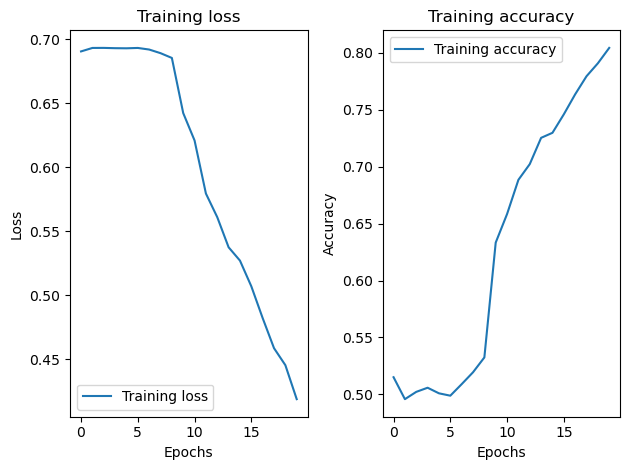

In [2]:
## Create the model and fit/test it
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from sklearn.model_selection import train_test_split

class CNNModel(keras.callbacks.Callback):
    def __init__(self) -> None:
        # Gemini code
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

        self.epoch_loss = None
        self.epoch_accuracy = None
        self.training_loss = None
        self.training_accuracy = None
        self.predicted_class = None

    def createModel(self):
        cnn_model = tf.keras.Sequential()

        # Inputs and rescaling
        cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))
        
        # Convolutional block 1
        cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        
        # Convolutional block 2
        cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        
        # Convolutional block 3
        cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        cnn_model.add(tf.keras.layers.GlobalAveragePooling2D())
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        
        # Dense block
        cnn_model.add(tf.keras.layers.Dense(512, activation='relu'))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


        cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return cnn_model

    def train_and_test_model(self):
        cnn_model = self.createModel()
        self.epoch_loss = []
        self.epoch_accuracy = []
        self.training_loss = []
        self.training_accuracy = []
        
        # Gemini code
        for epoch in range(1, 21):
            modelHistory = cnn_model.fit(self.x_train, self.y_train, epochs=1, batch_size=16, verbose=1)
        
            self.epoch_loss.append(modelHistory.history['loss'][0])
            self.epoch_accuracy.append(modelHistory.history['accuracy'][0])
                
                
        self.training_loss.append(self.epoch_loss)
        self.training_accuracy.append(self.epoch_accuracy)
        
        test_loss, test_acc = cnn_model.evaluate(self.x_test, self.y_test)
        print("Test mean accuracy", np.mean(test_acc))
        print("Test mean loss", np.mean(test_loss))
        
    def predict_model(self):
        predictions = self.model.predict(images_predict)  # Get predictions

        # Assuming categorical output, get most likely class labels
        predicted_classes = np.argmax(predictions, axis=1)

        num_images_to_display = 5  # Number of images to display visually

        for i in range(len(images_predict)):
            image = images_predict[i]
            actual_label = np.argmax(labels_predict[i]) if np.any(labels_predict[i]) else "Not provided"  # Check if ground truth label exists
            predicted_class = predicted_classes[i]

            print(f"\nImage {i+1}:")
            print(f"  Actual Label: {actual_label}")
            print(f"  Predicted Label: {predicted_class}")

            # Display some images visually (optional)
            if i < num_images_to_display:
                plt.imshow(image[..., 0], cmap='gray')  # Assuming grayscale images
                plt.title(f"Predicted: {predicted_class}")
                plt.axis('off')
                plt.show()

    
    # Code-structure from stack overflow
    def plotTrainingData(self):
        plt.subplot(1,2,1)
        plt.plot(np.mean(self.training_loss, axis=0), label="Training loss")
        plt.title("Training loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(np.mean(self.training_accuracy, axis=0), label="Training accuracy")
        plt.title("Training accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    # Gemini code
    def plot_predicted_images(self, num_images=4):
        # Get indices of first num_images test examples
        image_indices = np.random.choice(self.x_test.shape[0], size=num_images)

        # Get actual and predicted labels
        actual_labels = np.argmax(self.y_test[image_indices], axis=1)
        predicted_labels = self.predicted_classes[image_indices]

        plt.figure(figsize=(10, 6))
        for i, (image_index, actual_label, predicted_label) in enumerate(zip(image_indices, actual_labels, predicted_labels)):
            plt.subplot(2, 2, i + 1)
            plt.imshow(self.x_test[image_index][..., 0], cmap='gray')  # Assuming grayscale images
            plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

newCnn = CNNModel()

newCnn.train_and_test_model()
newCnn.plotTrainingData()
